# Los Angeles city payroll:
Are los angeles city workers pay increasing? and How can it be tested acuarately? The city has seen an increase in its average CPI. and must increase its workers payroll accordignly. I am using a Dataset that has payrolls from 2013 to 2016 to create sample studies grouped overal by year and using the Anual Salary and Base Pay to calculate a broad version of these tests.


# About:
Data includes department titles, job titles, projected annual salaries (with breakdowns of quarterly pay), bonuses, and benefits information.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statistics
%matplotlib inline

In [2]:
la_payroll = pd.read_csv(r'C:\Users\moren\OneDrive\Documents\la-city-payroll-data\data.csv', low_memory=False )
la_payroll.head()

,Row ID,Year,Department Title,Payroll Department,Record Number,Job Class Title,Employment Type,Hourly or Event Rate,Projected Annual Salary,Q1 Payments,...,MOU Title,FMS Department,Job Class,Pay Grade,Average Health Cost,Average Dental Cost,Average Basic Life,Average Benefit Cost,Benefits Plan,Job Class Link
0,111391,2014,Water And Power (DWP),NaN,1412316577,Commercial Service Representative,Full Time,NaN,$70386.48,$16129.89,...,NaN,98,1230,NaN,$16842.08,$1282.61,$0.00,$18124.69,DWP,http://per.lacity.org/perspecs/1230.pdf
1,31732,2013,Police (LAPD),4301.0,432728338,Police Officer I,Full Time,$25.12,$52450.56,$11331.00,...,POLICE OFFICERS UNIT,70,2214,A,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
2,27697,2013,Police (LAPD),4301.0,97182506,Police Officer II,Full Time,$42.77,$89303.76,$20036.32,...,POLICE OFFICERS UNIT,70,2214,2,$11651.40,$898.08,$191.04,$12740.52,Police,http://per.lacity.org/perspecs/2214.pdf
3,14136,2013,Harbor (Port of LA),3201.0,950136941,Senior Security Officer,Full Time,$28.75,$60028.96,$15793.88,...,SUPV BLUE COLLAR,42,3184,0,$10710.24,$405.24,$11.40,$11126.88,City,http://per.lacity.org/perspecs/3184.pdf
4,91896,2014,Public Works - Sanitation,7024.0,3230003445,Senior Clerk Typist,Full Time,$30.92,$64553.13,$14700.00,...,CLERICAL UNIT,82,1368,0,$11000.40,$409.68,$11.40,$11421.48,City,http://per.lacity.org/perspecs/1368.pdf


In [3]:
la_payroll = la_payroll[pd.notnull(la_payroll['Payroll Department'])]
la_payroll.rename(columns={'Projected Annual Salary' : 'Annual_sal'}, inplace = True)
la_payroll.rename(columns={'Job Class Title' : 'Job_title'}, inplace = True)
la_payroll.rename(columns={'Base Pay' : 'Base_Pay'}, inplace = True)

In [4]:
## Convert fiscal columns from strings to floats by removing the $, then convert. the dtype
for i in ['Annual_sal','Q1 Payments','Q2 Payments','Q3 Payments','Q4 Payments','Payments Over Base Pay',
          'Total Payments','Base_Pay','Permanent Bonus Pay','Longevity Bonus Pay','Temporary Bonus Pay','Overtime Pay',
          'Other Pay & Adjustments','Other Pay (Payroll Explorer)','Average Health Cost','Average Dental Cost',
          'Average Basic Life','Average Benefit Cost']:
    la_payroll[i] = la_payroll[i].str.replace('$','')

In [5]:
##outlieer removal 
la_payroll = la_payroll[la_payroll.Annual_sal != 0]  
la_payroll = la_payroll[la_payroll.Base_Pay != 0]
la_payroll.Annual_sal = la_payroll.Annual_sal.astype(float)
la_payroll.Base_Pay = la_payroll.Base_Pay.astype(float)


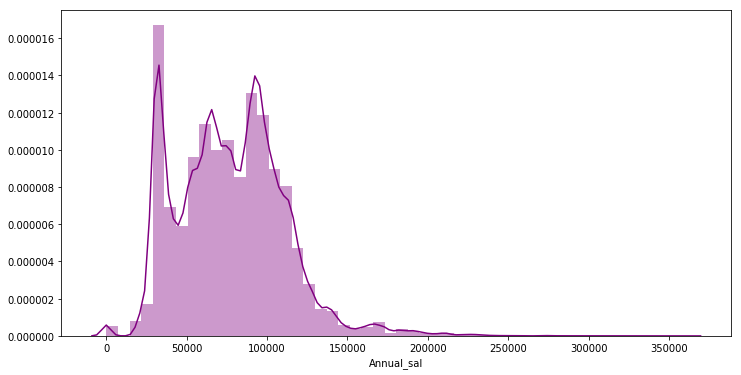

In [6]:
plt.figure(figsize = (12,6))
sns.distplot(la_payroll.Annual_sal,color = 'purple')

In [7]:
# Creating two different samples with the data based on year

payroll_2015 = la_payroll[la_payroll.Year ==2015]
payroll_2016 = la_payroll[la_payroll.Year ==2016]

In [8]:
# Calculating the population mean and Standard Deviation

pop_mean_2015 = payroll_2015['Annual_sal'].mean()
pop_std_2015 = statistics.stdev(payroll_2015.Annual_sal)
print("Population Mean: "+str(pop_mean_2015))
print("Population Standard Deviation: "+str(pop_std_2015))

Population Mean: 76046.39152505301
Population Standard Deviation: 34232.25489729045


In [9]:
# Calculating the samples

print("Population Mean: "+str(payroll_2016['Annual_sal'].mean()))
payroll_2016_sample = payroll_2016.sample(frac=0.10)
sample_mean_2016 = payroll_2016_sample['Annual_sal'].mean()
print("Sample Mean: "+str(sample_mean_2016))
sample_std_2016 = statistics.stdev(payroll_2016_sample.Annual_sal)
print("Sample Standard Deviation: "+str(sample_std_2016))
pop_std_2016= statistics.stdev(payroll_2016.Annual_sal)
print("Population Standard Deviation: "+str(pop_std_2016))

Population Mean: 78711.19987225177
Sample Mean: 79836.42539510381
Sample Standard Deviation: 33555.50967587984
Population Standard Deviation: 33572.9812108376


# Null Hypothesis: 
Pay does not increase in 2016 Alternate Hypothesis: It increases Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015 Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016

In [10]:
import math
# Confidence Level 95 %  for one sided Normal curve
zscore_critical = 1.65 
# Calculate the test statistics 
zscore_test_stat = ((sample_mean_2016 - pop_mean_2015)*math.sqrt(8916))/sample_std_2016
print(zscore_test_stat)

10.665084022509506


# Conclusion: 
 As the test statistics fall into the rejection region the null hypothesis is rejected and it can be concluded that the Annual salaries increase in 2016. However, we will first check for the Type 1 and Type 2 Error

Type 1 type 2 hypothesis error In statistical hypothesis testing, a type I error is the incorrect rejection of a true null hypothesis (a "false positive"), while a type II error is incorrectly retaining a false null hypothesis (a "false negative").



In [11]:
# checking the true value of the population characteristics
pop_mean_2016 = payroll_2016['Annual_sal'].mean()
pop_std_2016 = statistics.stdev(payroll_2016.Annual_sal)

zscore_error = ((pop_mean_2016 - pop_mean_2015)/pop_std_2016)
print(zscore_error)


0.07937359898019851


We can clearly see that we encountered a Type 1 error as the population mean is well within acceptable region (higher than 0.5)

# T-distribution
1. Null Hypothesis: pay does not increase in 2016 2. Alternate Hypothesis: it increases 3. Population parameters: Mean = pop_mean_2015, standard deviation = pop_std_2015 4. Sample parameters : Mean = sample_mean_2016, standard deviation = sample_std_2016

In [12]:
#Calculating the Sample Parameters

payroll_2014 = la_payroll[la_payroll.Year ==2014]
payroll_2015 = la_payroll[la_payroll.Year ==2015]

# Creating Sample distribution for T statistics
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)

In [13]:
payroll_t_2015_sample = payroll_2015.sample(frac=0.00062)
N = len(payroll_t_2015_sample)
sample_mean_2015 = payroll_t_2015_sample['Annual_sal'].mean()
sample_std_2015 = statistics.stdev(payroll_t_2015_sample.Annual_sal)
pop_std_2014  = statistics.stdev(payroll_2014.Annual_sal)
pop_mean_2014 = payroll_2014['Annual_sal'].mean()

In [14]:
# Confidence Level 95 %  for one sided T curve
t_critical = 1.311

# Calculating the test statistics 
tscore_test_stat = ((sample_mean_2015 - pop_mean_2014)*math.sqrt(N))/sample_std_2015

print(tscore_test_stat)

-0.34271033556081537


# Further Research:
Depending on the Test results we can accept or reject the Null. We are only looking at a small sample of the data if we continued to have t-test with different groups that have other measured variables that can add or reduce to payroll of the populations being tested. This can include lenght of time worked with the city, age and CPI. Both samples based on year can show a closer relation to increasing or insuficient-increasing of Pay in the los Angeles city work force. 

In [15]:
##Data Source: https://www.kaggle.com/cityofLA/city-payroll-data